In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import matplotlib.pyplot  as plt
import seaborn as sns

In [18]:
data = pd.DataFrame({
    "Potência (kW)": [120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
    "Eficiência (%)": [92, 65, 75, 85, 68, 95, 60, 80, 88, 70],
    "Idade (anos)": [3, 8, 5, 4, 7, 2, 10, 6, 3, 9],
    "Tamanho (m²)": [50, 45, 55, 60, 48, 62, 40, 58, 56, 47],
    "Consumo de Energia": ['Eficiente', 'Ineficiente', 'Ineficiente',
                           'Eficiente', 'Ineficiente', 'Eficiente',
                           'Ineficiente', 'Eficiente', 'Eficiente',
                           'Ineficiente']
})
 

In [19]:
X = data[['Potência (kW)', 'Eficiência (%)', 'Idade (anos)','Tamanho (m²)']]
y = data['Consumo de Energia']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [21]:
model = SVC(kernel= 'linear') # crio o modelo SVC
model.fit(X_train,y_train) # treino o modelo

SVC(kernel='linear')

In [6]:
y_pred = model.predict(X_test)

In [7]:
X_test

,Potência (kW),Eficiência (%),Idade (anos),Tamanho (m²)
8,115,88,3,56
1,80,65,8,45
5,130,95,2,62


In [8]:
data.head(20)

,Potência (kW),Eficiência (%),Idade (anos),Tamanho (m²),Consumo de Energia
0,120,92,3,50,Eficiente
1,80,65,8,45,Ineficiente
2,100,75,5,55,Ineficiente
3,110,85,4,60,Eficiente
4,90,68,7,48,Ineficiente
5,130,95,2,62,Eficiente
6,70,60,10,40,Ineficiente
7,105,80,6,58,Eficiente
8,115,88,3,56,Eficiente
9,85,70,9,47,Ineficiente


In [9]:
acuracy = accuracy_score(y_pred,y_test)
print(acuracy)

1.0


In [10]:
# Matriz de confusão
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[2 0]
 [0 1]]


Text(0.5, 1.0, 'Matriz de confusão para o algoritmo SVM')

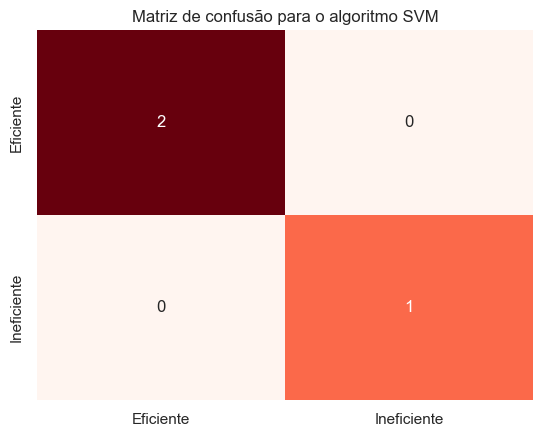

In [26]:
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Eficiente', 'Ineficiente'], 
            yticklabels=['Eficiente','Ineficiente'])    
                         
plt.title('Matriz de confusão para o algoritmo SVM')

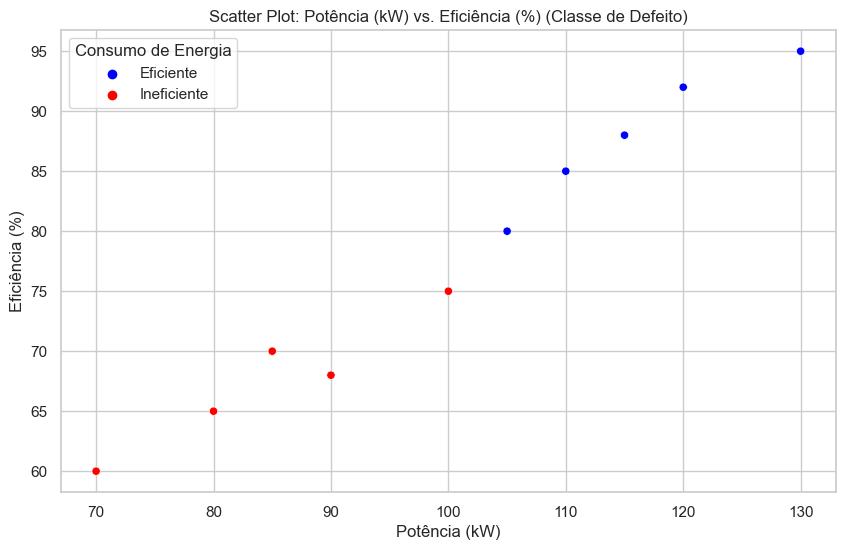

In [25]:
sns.set(style="whitegrid")
# Mapeando as cores com base no consumo de energia
palette = {"Eficiente": "blue", "Ineficiente": "red"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Potência (kW)', y=data['Eficiência (%)'], hue='Consumo de Energia', data=data, palette= palette)

# Personalizando o gráfico
plt.title('Scatter Plot: Potência (kW) vs. Eficiência (%) (Classe de Defeito)')
plt.xlabel('Potência (kW)')
plt.ylabel('Eficiência (%)')

# Mostrando o gráfico
plt.legend(title='Consumo de Energia')
plt.show()